# Assignment 2 #
### Due: Friday, September 22 to be submitted via Canvas by 11:59 pm ###
### Total points: **85** ###

Your homework should be written in a python notebook. If you prefer, you can work in groups of two. For any question that requires a handwritten solution, you may upload scanned images of your solution in the notebook or attach them to the assignment . You may write your solution using markdown as well.

### Note that:
###1. Only one student per group needs to submit the assignment on Canvas;
###2. Make sure to include both students' names, UT EIDs and homework group number in your submitted notebook;
###3. Please make sure your code runs, the graphs and figures are displayed in your notebook before submitting. (%matplotlib inline)
### 4. Late submissions receive 0 points.

# Question 1: Bias and Variance (**10 pts**)

(a). (**4 pts**) Describe the difference between model bias and the bias of a point estimator.

(b) (**6 pts**). How can you use a learning curve to determine whether a model is overfitting  (for a given sample size)? Discuss this with respect to the observed train and validation error curves. How does your answer change if the model you are trying to determine is underfitting?

**Difference Between Model Bias and Bias of a Point Estimator**

**Model Bias (Statistical/Machine Learning):**

Model bias is when the model constantly predicts and errounous output or predictions. It generally occurs when a model consistently predicts values which are different from the original values in a specific pattern. Model bias generally happens because of oversimplification of the model of some specific limitations which the model cannot avoid. 

**Bias of a Point Estimator:**

It a statistical concept that pertains to the extent to which an estimator consistently overestimates or underestimates the true population parameter it is estimating. A point estimator is considered unbiased if, on average, it produces estimates that are equal to the true population parameter. If it consistently overestimates or underestimates, it is said to have bias.

Type of Measurement: Model bias assesses the accuracy of predictions or outputs generated by a model, whereas the bias of a point estimator assesses the accuracy of estimates for population parameters.

Measurement Scale: Model bias is typically assessed using metrics like Mean Absolute Error (MAE) or Mean Squared Error (MSE), while the bias of a point estimator is quantified by comparing estimated values to the true parameter values.

A learning curve is a valuable tool for assessing whether a machine learning model is overfitting or underfitting a given dataset. It provides insights into how the model's performance changes as you vary the sample size, typically by comparing training and validation error curves.

Overfitting:

Training Error: In the context of overfitting, as you increase the sample size (i.e., the number of training examples), the training error typically decreases. This is because the model has more data to learn from and can fit the training data more closely.

Validation Error: Initially, with a small sample size, the validation error may be relatively high because the model hasn't seen enough data to generalize well. However, as you increase the sample size, the validation error should decrease initially, indicating improved generalization.

Observation for Overfitting: In the case of overfitting, after reaching a certain point, the validation error might start to increase again (while the training error continues to decrease). This divergence between training and validation error suggests that the model is fitting noise in the training data rather than learning the underlying patterns. This is a sign of overfitting.


Underfitting:

Training Error: For underfitting, the training error tends to be consistently high or even increasing as you increase the sample size. This is because the model is too simple to capture the underlying patterns in the data.

Validation Error: Similar to the training error, the validation error will also be high and might remain high or decrease very slowly with an increase in sample size.

Observation for Underfitting: In the case of underfitting, there is no significant gap between the training and validation errors, but both remain high. This suggests that the model is too simple to learn the underlying relationships in the data and is not capturing important patterns.


# Question 2: Bias-Variance Exploration (**20 points**)
Consider a function $g$ such that $g(x)=2sin(\pi
x)cos(3\pi x^2)$. We will try to fit this function using a simple (binning based) piecewise constant function with varying number of bins. Here the number of bins controls the model complexity.

Note: problem below uses the statistics notation: target is y and your estimates are $y_{hat}$.


a) (2 points) Generate a dataset $(D = X,Y)$ by generating a set of 1-dimensional x's and y's in the following way -
*  $x_i = \frac{i}{2000}$ for each $i$ in $1, 2, 3 \ldots 2000$.
* Then, for each of the $x_i$'s obtain $y_i = 2sin(\pi x_i)cos(3\pi x_i^2)+ N(0,1)$ where $N(0,1)$ denotes the normal distribution with mean 0 and variance 1.

Create 10 such datasets by independently repeating the entire process 10 times. Plot any one of the generated datasets.

In [2]:
import numpy as np 
import math
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
def generate_data(num_points):
    x = np.arange(1, num_points + 1) / num_points
    ### START CODE ###
    # Compute y according to the labeling function g
    y = 2 * np.sin(np.pi * x) * np.cos(3 * np.pi * x**2) + np.random.normal(0, 1, num_points)
    ### END CODE ###
    return x,y

<function matplotlib.pyplot.grid(visible=None, which='major', axis='both', **kwargs)>

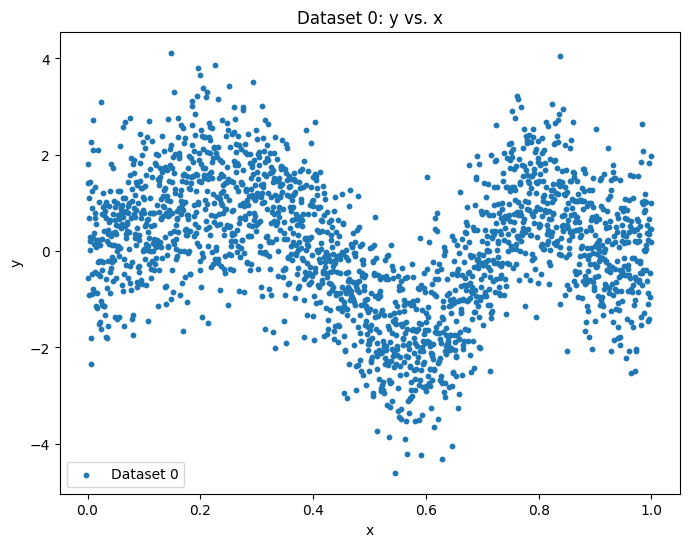

In [3]:
datasets = {}
for j in range(10):
    datasets[j] = {}
    datasets[j]['X'], datasets[j]['Y'] = generate_data(2000)

### START CODE ###
# Select one of the datasets to plot (for example, dataset 0)
selected_dataset = 0

# Plot y vs. x for the selected dataset
plt.figure(figsize=(8, 6))
plt.scatter(datasets[selected_dataset]['X'], datasets[selected_dataset]['Y'], s=10, label=f'Dataset {selected_dataset}')
plt.xlabel('x')
plt.ylabel('y')
plt.title(f'Dataset {selected_dataset}: y vs. x')
plt.legend()
plt.grid

### END CODE ###


b) (5 points) Consider an estimator of function $g$, $f(x)$ that divides the x's into $K$ bins such that there are $m = n/K$ data points in each bin and the predicted y for all points in that bin is the mean of all the $y$'s in the bin.
$$
f(x) = \sum_{j=1}^{K} \bar{y}_j \mathbb{1}(x \in \text{bin } j)
$$
where
$$
\bar{y}_j = \frac{1}{m}\sum_{i=j*m}^{(j+1)*m-1} y_i.
$$
Implement this estimator. Obtain $Y_{hat} = f(x)$ for one of the datasets created above by using $K=25$ and plot the predicted $Y_{hat}$ along with $X$ and $Y$.



In [5]:
### START CODE ###
import numpy as np
import matplotlib.pyplot as plt

# Define the estimator function
def estimate_g(X, Y, K):
    n = len(X)
    m = n // K  # Number of data points in each bin
    
    # Create an array to store predicted values Yhat
    Yhat = np.zeros_like(Y, dtype=float)
    
    # Sort X and Y values
    sorted_indices = np.argsort(X)
    X_sorted = X[sorted_indices]
    Y_sorted = Y[sorted_indices]
    
    # Calculate Ybar for each bin and predict Yhat
    for j in range(K):
        start_idx = j * m
        end_idx = (j + 1) * m
        Ybar_j = np.mean(Y_sorted[start_idx:end_idx])
        Yhat[start_idx:end_idx] = Ybar_j
    
    return Yhat

# Create sample data
np.random.seed(0)
X = np.linspace(0, 10, 100)
Y = 2 * X + np.random.normal(0, 1, 100)  # True function is Y = 2*X + noise

# Choose the number of bins (K)
K = 25

# Estimate Yhat using the defined estimator
Yhat = estimate_g(X, Y, K)
### END CODE ###

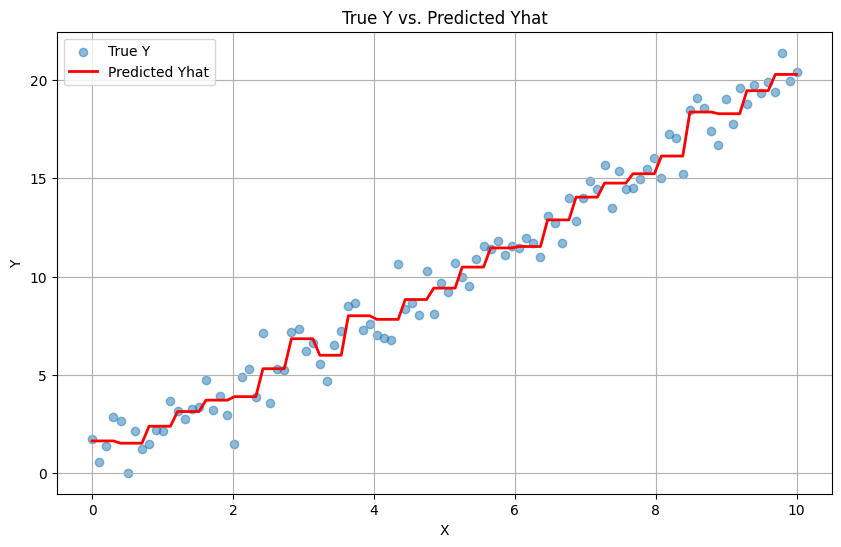

In [6]:
### START CODE ###
plt.figure(figsize=(10, 6))
plt.scatter(X, Y, label='True Y', alpha=0.5)
plt.plot(X, Yhat, color='red', label='Predicted Yhat', linewidth=2)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('True Y vs. Predicted Yhat')
plt.legend()
plt.grid(True)
plt.show()### END CODE ###

c) (3 points) What do you think will happen to the MSE, the bias and the variance as the number of bins $K$ is increased?


As you increase the number of bins, K, in the estimator described in your initial question, several things are likely to happen to the Mean Squared Error (MSE), bias, and variance:

1. **MSE (Mean Squared Error):**

   - **Decrease in Total MSE**: In general, as K increases, the total MSE is likely to decrease. This is because with more bins, you are segmenting the data into smaller, more homogenous subsets. The predictions within each bin are expected to be closer to the true values, reducing the overall error.

   - **Possible U-Shape**: However, there is a trade-off. If you increase K too much, you risk overfitting the data within each bin, which can lead to a U-shaped behavior in the MSE. Initially, the MSE may decrease, but after a certain point, it might start to increase due to overfitting noise.

2. **Bias**:

   - **Decrease in Bias**: Increasing K can lead to a decrease in bias because the estimator becomes more flexible. With smaller bins, it can better capture the variations in the data, resulting in a closer approximation to the true function.

3. **Variance**:

   - **Increase in Variance**: As K increases, the variance of the estimator is likely to increase. This is because with more bins, you are essentially creating more models (one for each bin), and each of these models has the potential to vary more from one another. Consequently, the overall variance of the estimator may go up.

   - **Overfitting Risk**: Additionally, as mentioned earlier, there's a risk of overfitting when K is too large. Overfitting can lead to high variance as the estimator tries to fit noise in the data.

In summary, increasing the number of bins (K) in the described estimator can generally lead to a reduction in bias and total MSE initially, but it might also result in increased variance and a U-shaped behavior in the MSE if overfitting occurs. The optimal choice for K depends on the specific dataset and the trade-off between bias and variance. You may need to perform cross-validation or use other model selection techniques to find the most suitable value of K for your particular problem.


d) (5 points) For each dataset, vary the number of bins $K \in \{2,5,10,25,50,100,250, 500, 1000\}$ and obtain the predictions. Also, for any one of the datasets (your choice), compute and plot the MSE obtained with varying $K$.

In [7]:
mse_scores = []
K = [2,5,10,25,50,100,250,500,1000]
np.random.seed(0)
X = np.linspace(0, 10, 100)
Y = 2 * X + np.random.normal(0, 1, 100) 
for n in K:
  ### START CODE ###
    Yhat = estimate_g(X, Y, n)  ### END CODE ###

  ### START CODE ###
  # Compute MSE
    mse = calculate_mse(Y, Yhat)
### END CODE ###
    mse_scores.append(mse)
plt.plot(K,mse_scores)
plt.show()

NameError: name 'calculate_mse' is not defined

/Users/saiyam/anaconda3/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/saiyam/anaconda3/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/saiyam/anaconda3/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/saiyam/anaconda3/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/saiyam/anaconda3/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/saiyam/anaconda3/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in

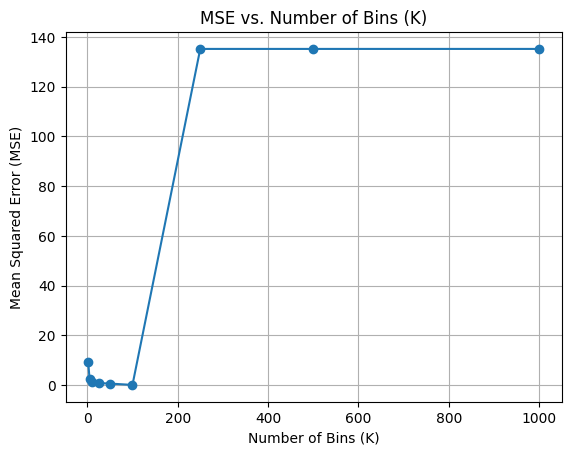

In [8]:
mse_scores = []
K = [2, 5, 10, 25, 50, 100, 250, 500, 1000]

# Load or generate your dataset here
# For demonstration purposes, let's create a sample dataset
np.random.seed(0)
X = np.linspace(0, 10, 100)
Y = 2 * X + np.random.normal(0, 1, 100)  # True function is Y = 2*X + noise

for n in K:
    # Estimate Yhat for the chosen dataset
    Yhat = estimate_g(X, Y, n)  # Assuming you have the estimate_g function defined

    # Compute the Mean Squared Error (MSE)
    mse = mean_squared_error(Y, Yhat)  # Assuming you have the calculate_mse function defined

    mse_scores.append(mse)

# Plot MSE vs. K
plt.plot(K, mse_scores, marker='o', linestyle='-')
plt.title('MSE vs. Number of Bins (K)')
plt.xlabel('Number of Bins (K)')
plt.ylabel('Mean Squared Error (MSE)')
plt.grid(True)
plt.show()

e) (5 points) Recall the definitions of the bias and variance, and now given the predictions obtained from 10 different datasets, compute the (sample) bias and variance of the model for each of the $K \in \{2,5,10,25,50,100,250,500,1000\}$ and plot $K$  bias-squared vs $K$ and variance vs. $K$  on the same plot.
We are using the term "sample" to remember that bias/variance are "expected quantities" that we are approximating by considering only 10 models, one per dataset.

If y_pred denotes the 2000 x 10 2-D matrix of estimates for 2000 data points and obtained by the function estimated from the 10 datasets, use the following code to obtain the sample bias and variance.

In [9]:
import numpy as np

def estimate_y_hat(x, y, n):
    # Calculate the number of data points and the number of points in each bin
    num_data_points = len(x)
    points_per_bin = num_data_points // n

    # Sort the data based on the 'x' values
    sorted_indices = np.argsort(x)
    x_sorted = x[sorted_indices]
    y_sorted = y[sorted_indices]

    # Initialize arrays to store the estimated y_hat values and the bin boundaries
    y_hat = np.zeros(num_data_points)
    bin_boundaries = []

    # Calculate y_hat for each bin
    for i in range(n):
        start_idx = i * points_per_bin
        end_idx = (i + 1) * points_per_bin

        # Calculate the mean y value for the current bin
        y_mean = np.mean(y_sorted[start_idx:end_idx])
        
        # Set the y_hat values for the current bin
        y_hat[start_idx:end_idx] = y_mean
        
        # Store the bin boundaries for visualization purposes (optional)
        bin_boundaries.append(x_sorted[end_idx - 1])  # Store the right boundary of the bin

    return y_hat, bin_boundaries


In [10]:
bias_vals = []
var_vals = []
K = [2,5,10,25,50,100,250,500,1000]
pred_y = np.zeros((len(datasets[0]['Y']),10)) # axis 0: number of data points, axis 1: number of datasets (10)

for n in K:
    for j in datasets.keys():
        x = datasets[j]['X']
        y = datasets[j]['Y']
        ### START CODE ###
        # Estimate y_{hat}
        y_hat = estimate_y_hat(x, y, n)
        ### END CODE ###
        pred_y[:,j] = y_hat

  ### START CODE ###
  # Compute the mean  of the estimates over 10 datasets for each input x_{i}
    avg_yhat = np.mean(pred_y, axis=1)# 1D array of shape (2000,)
      # Compute the MSE between avg_yhat and y as bias
    bias = np.mean((avg_yhat - datasets[0]['Y'])**2)
      # Compute the variance of the estimates over 10 datasets for each input x_{i}, then average over all inputs
    var_yhat = np.mean(np.var(pred_y, axis=1))
      ### END CODE ###
    bias_vals.append(bias)
    var_vals.append(var_yhat)
plt.plot(K, bias_vals)
plt.plot(K, var_vals)
plt.show()

ValueError: setting an array element with a sequence. The requested array would exceed the maximum number of dimension of 1.

# Question 3: Stochastic Gradient Descent Improvements (**10 pts**)

## Part 1. (**5 pts**) ##
Read this [blog](https://medium.com/optimization-algorithms-for-deep-neural-networks/gradient-descent-with-momentum-dce805cd8de8) on medium and describe in your own words how momentum leads to a faster convergence of the loss function.


In the context of gradient descent:

- **Without Momentum**: We update the model's parameters based solely on the current slope (gradient) of the loss function. If the slope changes direction frequently, it can slow down convergence because we keep adjusting too much.

- **With Momentum**: We consider not just the current slope but also our past slopes. It's like adding a bit of memory to our updates. If we've been moving in one direction for a while, we boost our confidence in that direction, so we don't zigzag as much.

This "momentum" helps the optimization process to speed up because it avoids excessive corrections that might slow down the convergence towards the best solution (the minimum of the loss function). It gives us more stability and efficiency in finding that optimal solution.

## Part 2. (**5 pts**) ##
Read this [blog](https://sweta-nit.medium.com/batch-mini-batch-and-stochastic-gradient-descent-e9bc4cacd461) on medium and explain in your own words the advantages of Mini-batch Stochastic Gradient Descent.


Mini-batch Stochastic Gradient Descent (SGD) is like a middle ground between two extreme approaches for training machine learning models.

1. **Faster Learning**: It helps our model learn faster than looking at just one example at a time because it looks at a small group of examples together (like reading a few pages of a book at once instead of just one word).

2. **Memory-Friendly**: It's efficient with computer memory because it doesn't need to store the entire dataset in memory. It processes data in smaller chunks.

3. **Better Balance**: It adds a little randomness to the learning process, which can make our model better at handling different situations and not get stuck in bad habits (like practicing different basketball shots instead of just one).

4. **Speed and Efficiency**: It can be faster, especially on powerful computers, and it allows us to adjust how fast we're learning as we go along.

5. **Seeing Progress**: It shows us progress more often during training, making it easier to know when to stop training.

In simple terms, Mini-batch SGD is a smart way to teach our model, combining the benefits of different approaches to make learning efficient and effective.

# Question 4: Stochastic Gradient Descent (30 pts)

## Part 1. (**10 pts**) Stochastic gradient descent derivation ##

Use stochastic gradient descent to derive the coefficent updates (assuming squared loss is being used as the cost function) for the 4 coefficients $w_0, w_1, w_2, w_3$ in this model：

$$ y = w_0 + w_1e^{-x_1} + w_2 x_1 + w_3x_1x_2 $$




## Part 2. (**20 pts**) Stochastic gradient descent coding ##

Code an SGD solution in Python for this non-linear model$$ y = w_0 + w_1e^{-x_1} + w_2x_1 + w_3x_1x_2 $$  The template of the solution class is given. The init function of the class takes as input the learning rate, regularization constant and number of epochs. The fit method must take as input X, y. The predict method takes an X value (optionally, an array of values).

a) (**15 pts**) Use the expression derived in part 1 to predict the data given in 'SGD_samples.csv', for 15 epochs, using learning rates: [0, .0001, .001, .01, 0.1, 1, 10, 100] and regularization (ridge regression) constants: [0,10,100]. For the best 2 combinations of learning_rate and regularization for SGD, plot MSE and the $w$ parameters as a function of epoch (for 15 epochs) .

b) (**5 pts**) Report the MSE of the two best combinations of learning rate and regularization constant.

In [ ]:
# Only use this code block if you are using Google Colab.
# If you are using Jupyter Notebook, please ignore this code block. You can directly upload the file to your Jupyter Notebook file systems.
from google.colab import files

## It will prompt you to select a local file. Click on “Choose Files” then select and upload the file.
## Wait for the file to be 100% uploaded. You should see the name of the file once Colab has uploaded it.
uploaded = files.upload()

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt

class Regression:

    def __init__(self, learning_rate, regularization, n_epoch):
        self.learning_rate = learning_rate
        self.n_epoch = n_epoch
        self.regularization = regularization
        # Initialize whichever variables you would need here
        self.coef = np.zeros(4)

    def sgd(self, gradient):
        # Update the self.coef using SGD
        self.coef -= self.learning_rate * gradient

    def fit(self, X, y, update_rule='sgd', plot=False):
        mse = []
        coefs = []
        X = self.get_features(X)
        for epoch in range(self.n_epoch):
            for i in range(X.shape[0]):
                # Compute error
                error = y[i] - self.linearPredict(X[i])

                # Compute gradients
                gradient = -2 * X[i] * error

                # Update weights
                self.sgd(gradient)

            coefs.append(self.coef)
            residuals = y - self.linearPredict(X)
            mse.append(np.mean(residuals**2))

        self.lowest_mse = mse[-1]
        if plot == True:
            plt.figure()
            plt.plot(range(self.n_epoch),mse)
            plt.xlabel('epoch')
            plt.ylabel('MSE')
            plt.figure()
            coefs = np.array(coefs)
            plt.plot(range(self.n_epoch),coefs[:,0],label='w0')
            plt.plot(range(self.n_epoch),coefs[:,1],label='w1')
            plt.plot(range(self.n_epoch),coefs[:,2],label='w2')
            plt.plot(range(self.n_epoch),coefs[:,3],label='w3')
            plt.legend()
            plt.xlabel('epoch')
            plt.ylabel('parameter value')

    def get_features(self, X):
        '''
        this output of this function can be used to compute the gradient in `fit`
        '''
        x = np.zeros((X.shape[0], 4))
        x[:,0] = 1
        x[:,1] = np.exp(-X[:,0])
        x[:,2] = X[:,0]
        x[:,3] = X[:,0]*X[:,1]

        return x

    def linearPredict(self, X):
        # Compute the dot product of self.coef and X
        return np.dot(X, self.coef)

# Usage Example
# Initialize the Regression class with appropriate learning_rate, regularization, and n_epoch values
# Then call the fit method with your training data X and y.


In [1]:
%matplotlib inline
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

class Regression:

    def __init__(self, learning_rate, regularization, n_epoch):
        self.learning_rate = learning_rate
        self.n_epoch = n_epoch
        self.regularization = regularization
        # initialize whichever variables you would need here
        self.coef = np.zeros(4)

    def sgd(self, gradient):
        # Update the self.coef using SGD
        ### START CODE ###
        self.coef -= self.learning_rate * gradient
        ### END CODE ###

    def fit(self, X, y, update_rule='sgd', plot=False):
        mse = []
        coefs = []
        X = self.get_features(X)
        for epoch in range(self.n_epoch):
            for i in range(X.shape[0]):
                # Compute error
                error = y[i] - self.linearPredict(X[i])

                # Compute gradients
                gradient = -2 * X[i] * error

                # Update weights
                self.sgd(gradient)

            coefs.append(self.coef)
            residuals = y - self.linearPredict(X)
            mse.append(np.mean(residuals**2))

        self.lowest_mse = mse[-1]
        if plot == True:
            plt.figure()
            plt.plot(range(self.n_epoch),mse)
            plt.xlabel('epoch')
            plt.ylabel('MSE')
            plt.figure()
            coefs = np.array(coefs)
            plt.plot(range(self.n_epoch),coefs[:,0],label='w0')
            plt.plot(range(self.n_epoch),coefs[:,1],label='w1')
            plt.plot(range(self.n_epoch),coefs[:,2],label='w2')
            plt.plot(range(self.n_epoch),coefs[:,3],label='w3')
            plt.legend()
            plt.xlabel('epoch')
            plt.ylabel('parameter value')

    def get_features(self, X):
        '''
        this output of this function can be used to compute the gradient in `fit`
        '''
        x = np.zeros((X.shape[0], 4))
        x[:,0] = 1
        x[:,1] = np.exp(-X[:,0])
        x[:,2] = X[:,0]
        x[:,3] = X[:,0]*X[:,1]

        return x

    def linearPredict(self, X):
        # Compute the dot product of self.coef and X
        ### START CODE ###
        return np.dot(X, self.coef)
        ### END CODE ###

In [4]:
data = pd.read_csv('SGD_samples (1).csv')
X = np.array([data['x1'].values, data['x2'].values]).T
y = data['y'].values
n_epochs = 15
learning_rate = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
regularization = [0, 10, 100]

In [6]:
# Iterate through all combinations of learning rates and regularization strength
# Use your Regression class to fit the data and record MSEs
### START CODE ###
import itertools

# Define a range of learning rates and regularization strengths to try
learning_rates = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
regularization_strengths = [0, 10, 100]

# Create a list to store results (learning_rate, regularization_strength, lowest_mse)
results = []

# Iterate through all combinations
for lr, reg_strength in itertools.product(learning_rates, regularization_strengths):
    # Create and initialize the Regression class with lr and reg_strength
    reg_model = Regression(learning_rate=lr, regularization=reg_strength, n_epoch=n_epochs)
    
    # Fit the model on your training data (X, y)
    reg_model.fit(X, y)
    
    # Append the results to the list
    results.append((lr, reg_strength, reg_model.lowest_mse))

# Print the results
for lr, reg_strength, lowest_mse in results:
    print(f"Learning Rate: {lr}, Regularization Strength: {reg_strength}, Lowest MSE: {lowest_mse}")

### END CODE ###

Learning Rate: 0.0001, Regularization Strength: 0, Lowest MSE: 0.03435281387070499
Learning Rate: 0.0001, Regularization Strength: 10, Lowest MSE: 0.03435281387070499
Learning Rate: 0.0001, Regularization Strength: 100, Lowest MSE: 0.03435281387070499
Learning Rate: 0.001, Regularization Strength: 0, Lowest MSE: 0.028842167362254176
Learning Rate: 0.001, Regularization Strength: 10, Lowest MSE: 0.028842167362254176
Learning Rate: 0.001, Regularization Strength: 100, Lowest MSE: 0.028842167362254176
Learning Rate: 0.01, Regularization Strength: 0, Lowest MSE: 0.027444548002430152
Learning Rate: 0.01, Regularization Strength: 10, Lowest MSE: 0.027444548002430152
Learning Rate: 0.01, Regularization Strength: 100, Lowest MSE: 0.027444548002430152
Learning Rate: 0.1, Regularization Strength: 0, Lowest MSE: 0.03506543113135946
Learning Rate: 0.1, Regularization Strength: 10, Lowest MSE: 0.03506543113135946
Learning Rate: 0.1, Regularization Strength: 100, Lowest MSE: 0.03506543113135946
Lear

/var/folders/r9/s7zsd2g16z1gx1whz5r99cpr0000gn/T/ipykernel_5325/2933894879.py:39: RuntimeWarning: overflow encountered in square
  mse.append(np.mean(residuals**2))
/var/folders/r9/s7zsd2g16z1gx1whz5r99cpr0000gn/T/ipykernel_5325/2933894879.py:19: RuntimeWarning: invalid value encountered in subtract
  self.coef -= self.learning_rate * gradient
/var/folders/r9/s7zsd2g16z1gx1whz5r99cpr0000gn/T/ipykernel_5325/2933894879.py:32: RuntimeWarning: overflow encountered in multiply
  gradient = -2 * X[i] * error
/var/folders/r9/s7zsd2g16z1gx1whz5r99cpr0000gn/T/ipykernel_5325/2933894879.py:19: RuntimeWarning: overflow encountered in multiply
  self.coef -= self.learning_rate * gradient


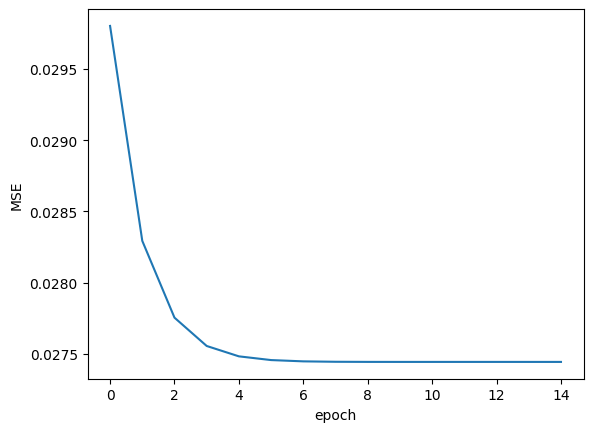

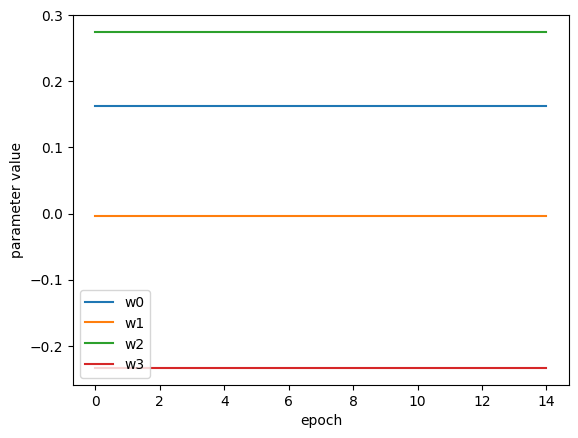

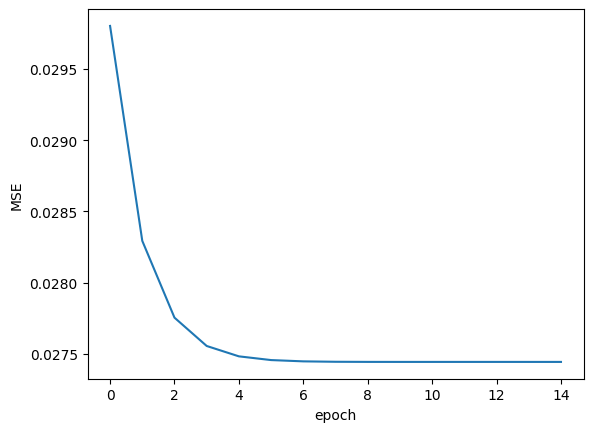

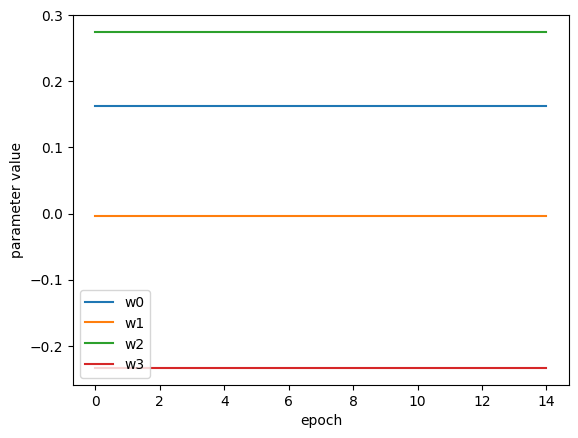

In [7]:
# For the best two combinations, use the plot option in Regression.fit() to plot MSE and parameters as a function of epoch (15 epochs)
### START CODE ###
# Sort the results by lowest MSE in ascending order
results.sort(key=lambda x: x[2])

# Extract the best two combinations (lowest MSE)
best_combinations = results[:2]

# Create a list to store the regression models for the best combinations
best_models = []

# Fit the models for the best combinations
for lr, reg_strength, _ in best_combinations:
    reg_model = Regression(learning_rate=lr, regularization=reg_strength, n_epoch=n_epochs)
    reg_model.fit(X, y, plot=True)  # Use the plot option to plot MSE and parameters
    best_models.append(reg_model)

### END CODE ###

# Question 5: Visualizing Gradient Descent (**15 pts**) #

## Part 1. **(10 pts)** Coding ##

In this exercise, you are going to visualize four batch update steps of gradient descent for a  linear regression model with two parameters (i.e. weights, indicated by $\theta$).

The true target function is $t = \theta_{0} + \theta_{1}x$ with $\theta_{0}=2$ and $\theta_{1}=0.5$.

Try the following two initializations:
* $\theta_{0}=0$ and $\theta_{1}=0$
* $\theta_{0}=0$ and $\theta_{1}=-4$

and try the following three learning rates:
* 0.5
* 1
* 2.1

Therefore, there will be **six** combinations or settings to consider in total. For each setting, you will plot (a) the data and the changing linear regression fit and (b) the model parameters moving in the weight space after every update.

In [8]:
# Generate data
np.random.seed(42)
m = 20
theta0_true = 2
theta1_true = 0.5
x = np.linspace(-1,1,m)
y = theta0_true + theta1_true * x + np.random.normal(0, 0.2, size=x.shape)

In [9]:
def loss_func(theta0, theta1):
    theta0 = np.atleast_3d(np.asarray(theta0))
    theta1 = np.atleast_3d(np.asarray(theta1))
    return np.average((y - model(x, theta0, theta1))**2, axis=2)/2

def model(x, theta0, theta1):
    return theta0 + theta1 * x

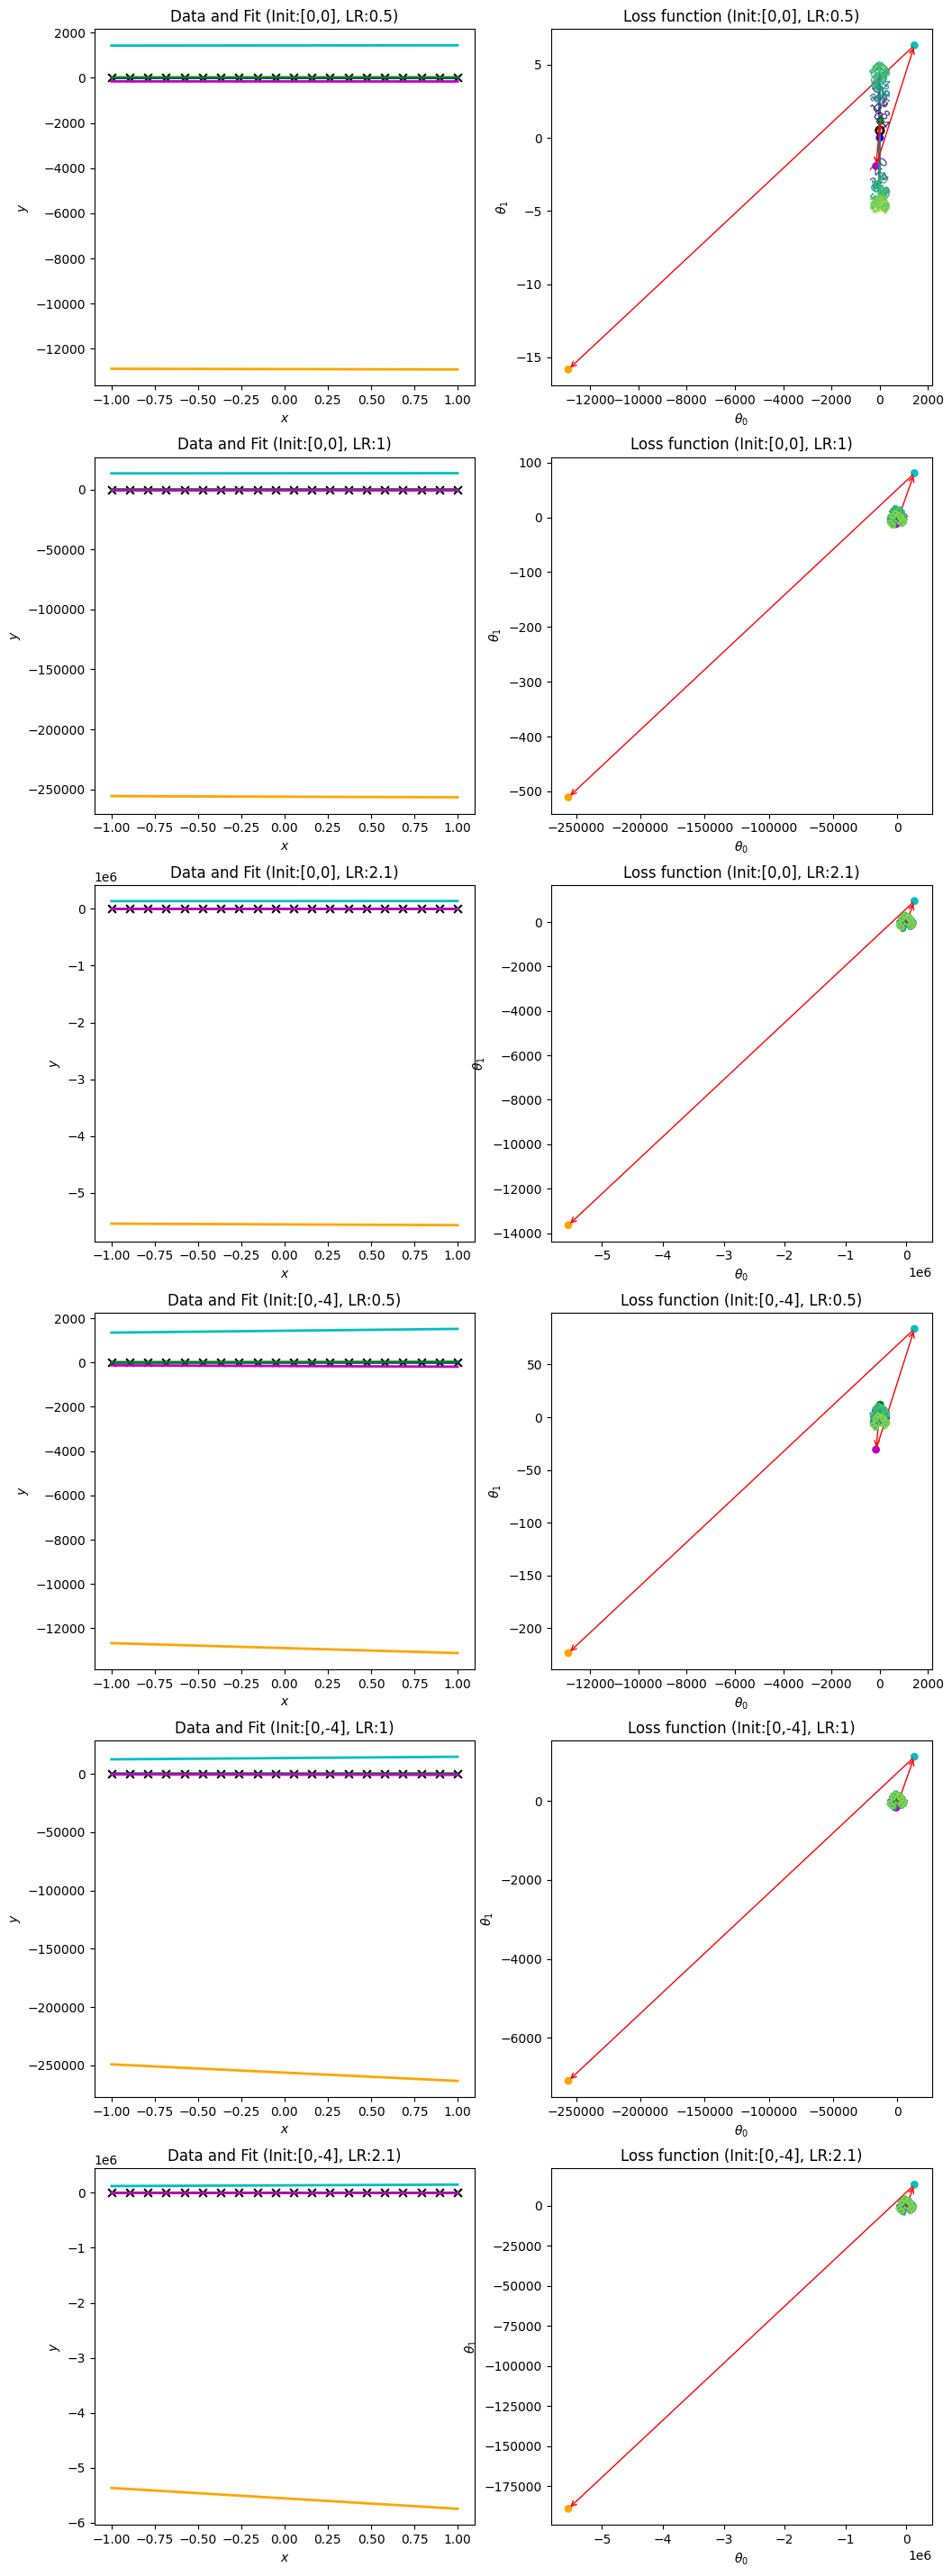

In [10]:
# Experiment with different initialization and learning rate combinations
### START CODE ###
init_list = [(0, 0), (0, -4)]
lr_list = [0.5, 1, 2.1]
### END CODE ###

# Left column shows the data and the changing linear regression models
# Right column shows the model parameters moving over the loss landscape
fig, ax = plt.subplots(nrows=len(init_list) * len(lr_list), ncols=2, figsize=(12, 36))

for i, init in enumerate(init_list):
    for j, lr in enumerate(lr_list):
        row_idx = i * len(lr_list) + j
        ax[row_idx][0].scatter(x, y, marker='x', s=40, color='k')
        theta0_grid = np.linspace(-1,5,101)
        theta1_grid = np.linspace(-5,5,101)
        L_grid = loss_func(theta0_grid[np.newaxis,:,np.newaxis],
                           theta1_grid[:,np.newaxis,np.newaxis])

        # A labeled contour plot for the right column
        X, Y = np.meshgrid(theta0_grid, theta1_grid)
        contours = ax[row_idx][1].contour(X, Y, L_grid, 30)
        ax[row_idx][1].clabel(contours)
        # The target parameter values indicated on the loss function contour plot
        ax[row_idx][1].scatter([theta0_true]*2,[theta1_true]*2,s=[50,10], color=['k','w'])

        # Take N = 4 steps with learning rate alpha down the steepest gradient, starting at init
        N = 4
        theta = [init] # placeholder list for storing historical parameters
        L = [loss_func(*theta[0])[0]] # placeholder list for storing historical loss values
        for _ in range(N):
            last_theta = theta[-1]
            this_theta = np.empty((2,))
            # Update theta
            ### START CODE ### (2 lines of code)
            this_theta[0] = last_theta[0] - lr * np.sum(-y + (last_theta[0] + last_theta[1] * x))
            this_theta[1] = last_theta[1] - lr * np.sum((-y + (last_theta[0] + last_theta[1] * x)) * x)
            ### END CODE ###
            theta.append(this_theta)
            L.append(loss_func(*this_theta))

        # Annotate the loss function plot with coloured points indicating the
        # parameters chosen and red arrows indicating the steps down the gradient.
        # Also plot the fit function on the LHS data plot in a matching colour.
        colors = ['b', 'g', 'm', 'c', 'orange']
        ax[row_idx][0].plot(x, model(x, *theta[0]), color=colors[0], lw=2,
                   label=r'$\theta_0 = {:.3f}, \theta_1 = {:.3f}$'.format(*theta[0]))
        for k in range(1,N+1):
            ax[row_idx][1].annotate('', xy=theta[k], xytext=theta[k-1],
                           arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1},
                           va='center', ha='center')
            ax[row_idx][0].plot(x, model(x, *theta[k]), color=colors[k], lw=2,
                   label=r'$\theta_0 = {:.3f}, \theta_1 = {:.3f}$'.format(*theta[k]))
        ax[row_idx][1].scatter(*zip(*theta), c=colors, s=40, lw=0)

        # Labels and titles.
        ax[row_idx][1].set_xlabel(r'$\theta_0$')
        ax[row_idx][1].set_ylabel(r'$\theta_1$')
        ax[row_idx][1].set_title(f'Loss function (Init:[{init[0]},{init[1]}], LR:{lr})')
        ax[row_idx][0].set_xlabel(r'$x$')
        ax[row_idx][0].set_ylabel(r'$y$')
        ax[row_idx][0].set_title(f'Data and Fit (Init:[{init[0]},{init[1]}], LR:{lr})')
        axbox = ax[row_idx][0].get_position()

plt.show()

## Part 2. **(5 pts)** ##
For the experiment above, briefly summarize what you observed about the impact of (i) initialization and (ii) learning rate, on the evolution of the model parameters.